**Сборный проект "Исследовательский и статистический анализ рынка компьютерных игр"**

**Описание проекта:**
В рамках данного проекта необходимо осуществить предобработку полученных данных, а также провести исследовательский и статистический анализ в целях проверки поставленных гипотез и определения критериев успешности игр

**План работы:**
1. Открыть файл с данными и изучить общую информацию.
2. Подготовить данные.
 - заменить названия столбцов (привести к нижнему регистру);
 - преобразовать данные в нужные типы. Описать, в каких столбцах заменила тип данных и почему;
 - обработать пропуски при необходимости:
 -- объяснить, почему заполнила пропуски определённым образом или почему не стала это делать;
 -- описать причины, которые могли привести к пропускам;
 -- разобрать 'tbd' и описать, как его обработать;
 - посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3.  Провести исследовательский анализ данных.
 - просмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - просмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - не учитывать в работе данные за предыдущие годы.
 - какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
 - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
 - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
 - соотнести выводы с продажами игр на других платформах.
 - посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона (определить для пользователя каждого региона (NA, EU, JP)):
 - самые популярные платформы (топ-5). Описать различия в долях продаж.
 - самые популярные жанры (топ-5). Пояснить разницу.
 - влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы.
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Написать общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

**Шаг 1. Изучение основной информации**

In [2]:
data = pd.read_csv(r'C:\Users\660\OneDrive\Рабочий стол\games.csv') #открываю файл с данными и изучаю основную информацию

In [3]:
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, на первом шаге я импортировала основные библиотеки, которые понадобятся во время работы над проектом, ознакомилась с общей информацией о датафрейме, изучила количество строк, типы данных, как выглядят заголовки столбцов датафрейма. На данном этапе уже видны данные, требующие предобработки: пропуски, верхний регистр столбцов, неверно заданные типы данных

**Шаг 2. Подготовка данных**

In [4]:
data.columns = data.columns.str.lower() # привела все названия столбцов к нижнему регистру
display(data.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64') # перевела год в целые числа,
# т.к. смысла записи года в вещественных числах нет, год это всегда целое число
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum() # проверила, что нет явных дубликатов

0

In [7]:
data['name'].unique() # проверила неявные дубли

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
data['platform'].unique() # проверила неявные дубли в названиях платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['year_of_release'].unique() # проверила неявные дубли в годах и заодно период анализируемый

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [10]:
data['genre'].unique() # проверила неявные дубли в жанрах

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [12]:
data['user_score'].sort_values().unique() 

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце user_score мной выявлено выбивающееся строковое значение tbd, поэтому уберу его, применив coerce, данный метод позволяет некорректные значения принудительно заменить на NaN

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # оценки пользователей перевела в вещественные числа
# т.к. они могут пригодиться в дальнейшем для проведения математических операций
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
data.isna().sum() # проверяю пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Количество пропусков в name, year_of_release, genre незначительно, в связи с чем я удаляю данные пропуски

In [16]:
data = data.dropna(subset = ['name', 'year_of_release', 'genre']) # удалила строки с пропусками
data.isna().sum() # проверила, как прошло удаление

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В столбцах critic_score, user_score, rating значительное количество пропусков, в связи с чем их удаление исказит общую информацию датафрейма. Заменять их средними значениями также считаю нецелесообразным, поскольку в данном случае также возникает вероятность исказить информацию при замене пропусков, например, медианными значениями. 

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# добавила новый столбец с общими продажами по всем странам

In [18]:
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [20]:
#data[data.duplicated(['name', 'platform', 'year_of_release'])]
# ищу повторяющиеся значения в определенных столбцах

In [21]:
display(data[data.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = 'first')])
display(data[data.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = 'last')])
# ищу повторяющиеся значения в определенных столбцах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56


Таким образом, я нашла повторяющиеся строки: это строки 604 и 16230. Удаляю дубликат

In [22]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])

In [23]:
display(data[data.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = 'first')])
display(data[data.duplicated(subset = ['name', 'platform', 'year_of_release'], keep = 'last')])
# проверяю, что дубликат удалился

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [24]:
data.info()
# проверяю общий датафрейм

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


Таким образом, по результатам проведенной предобработки я привела названия столбцов к нижнему регистру, преобразовала данные в нужные типы, а также обработала пропуски и дубликаты. Часть пропусков, вероятно, вызвана человеческим фактором, таких пропусков немного (столбцы name, year_of_release, genre), и они были удалены, поскольку удаление таких незначительных по количеству пропусков не повлияет на данные в целом, при этом имеются довольно большие пропуски в critic_score, user_score, rating, такие пропуски могли быть вызваны сбоем, удалять данные пропуски, как и заменять медианными/средними значениями нецелесообразно, так как это окажет большое влияние на датафрейм в целом, в связи с чем я приняла решение оставить данные пропуски.

**Шаг 3. Проведение исследовательского анализа данных**

In [25]:
year_name_pivot = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
display(year_name_pivot)
# просматриваю, сколько игр выпускалось в разные годы

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


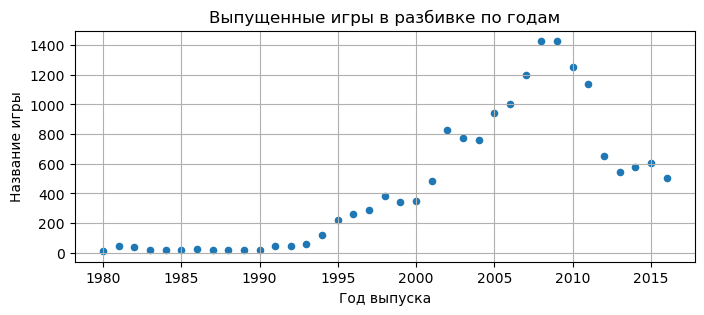

In [71]:
year_name_pivot.plot(x = 'year_of_release', y = 'name', grid = True, kind = 'scatter', \
                        xlabel = 'Год выпуска', ylabel = 'Название игры', title = 'Выпущенные игры в разбивке по годам',\
                           figsize = (8,3))
plt.show()

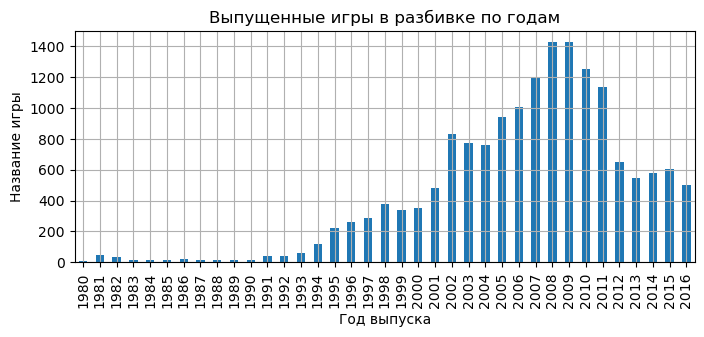

In [72]:
year_name_pivot.plot(x = 'year_of_release', y = 'name', grid = True, kind = 'bar', \
                        xlabel = 'Год выпуска', ylabel = 'Название игры', title = 'Выпущенные игры в разбивке по годам',\
                           figsize = (8,3), legend=False)
plt.show()
# убрала тут legend(), показалось, что с ним будет график перегруженным, оси и название и так дают достаточно информации, 
#на мой взгляд

По результатам анализа данных, представленных в таблице и визуализированных на графиках, установлено, что за период с 1980 по 1991 выпускалось меньше всего игр. с 1991 и далее в целом начинается постепенный рост количество выпущенных игр. Наибольшее количество игр выпущено в 2008-2009 годах. Таким образом, данные за период до 1991 года не важны.

In [28]:
data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False).head(10)
#получила топ-10 платформ с общими продажами

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


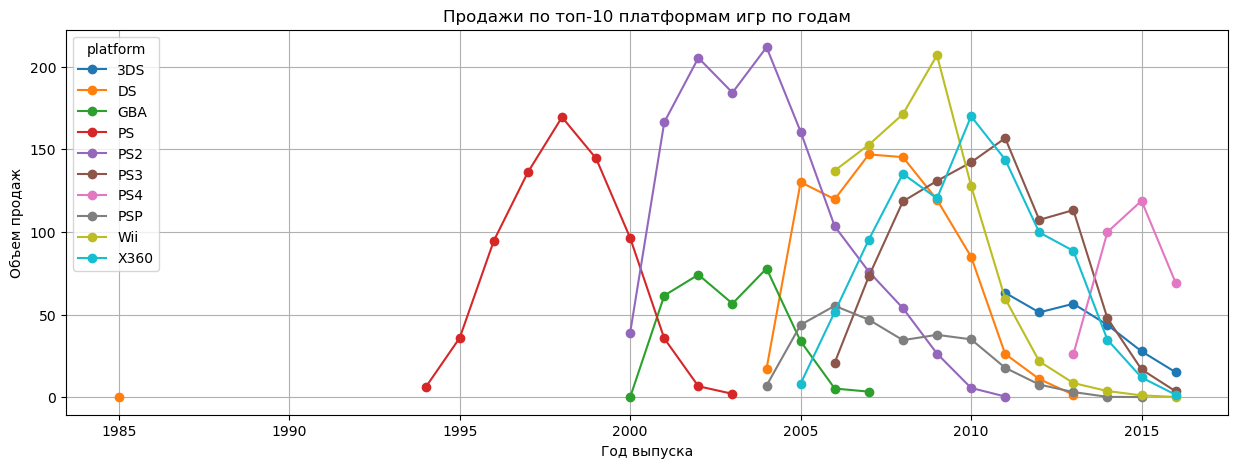

In [29]:
data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]').\
pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').\
plot(grid = True, figsize = (15,5), style = 'o-', xlabel = 'Год выпуска', ylabel = 'Объем продаж', label = 'Платформа')
plt.title('Продажи по топ-10 платформам игр по годам')
plt.show()
# с помощью среза получила диаграмму по топ-10 платформам по годам и объему продаж

In [30]:
data_PS2_platform_year = data.query('platform == "PS2"')
data_PS2_platform_year_pivot = data_PS2_platform_year.pivot_table(index = ['platform', 'year_of_release'], \
                                                                      values = 'total_sales').reset_index()
data_PS2_platform_year_pivot.sort_values(by = 'year_of_release')
# на примере одной платформы посмотрела периодичность выпуска игр и "жизнеспособность" платформы в целом

,platform,year_of_release,total_sales
0,PS2,2000,0.477683
1,PS2,2001,0.899622
2,PS2,2002,0.733500
3,PS2,2003,0.719961
4,PS2,2004,0.817799
5,PS2,2005,0.617923
6,PS2,2006,0.399305
7,PS2,2007,0.355093
8,PS2,2008,0.282199
9,PS2,2009,0.275000


Таким образом, в среднем "жизнеспособный" цикл каждой платформы составляет около 10 лет (в основном 10-12 лет, некоторые 4,6,8 лет), новые платформы появляются каждый год. В качестве примера я рассмотрела год выпуска платформы PS2: она выпускалась ежегодно, начиная с 2000 и заканчивая 2011.

Чтобы сделать прогноз на 2017 год, я считаю целесообразным рассмотреть наиболее актуальные для анализа годы: период с 2014 по 2016 гг.

C:\Users\660\AppData\Local\Temp\ipykernel_7848\2762077349.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data_year_query = data.query('year_of_release == [2014, 2015, 2016]')


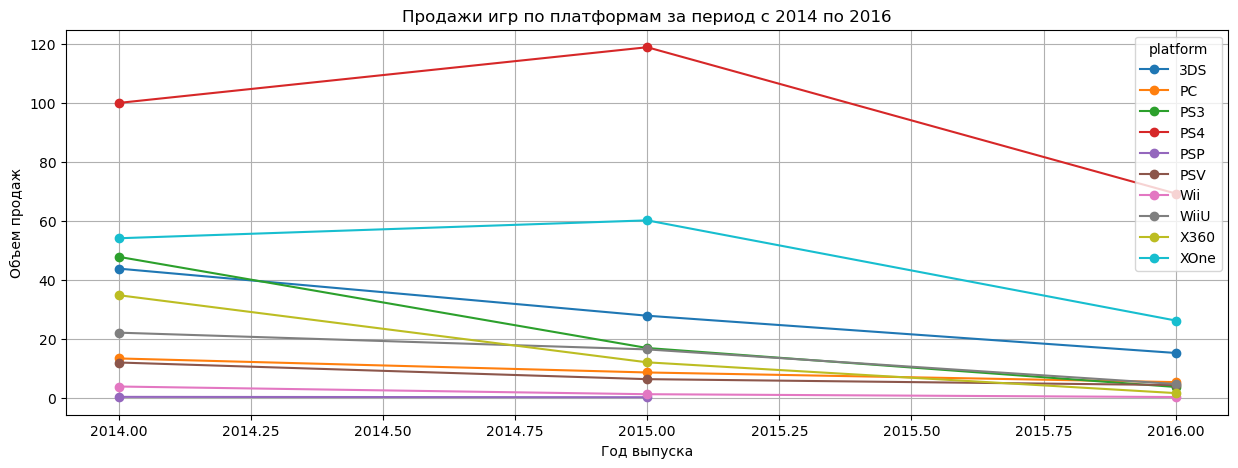

In [31]:
data_year_query = data.query('year_of_release == [2014, 2015, 2016]')
data_year_query.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').\
plot(grid = True, figsize = (15,5), style = 'o-', xlabel = 'Год выпуска', ylabel = 'Объем продаж', label = 'Платформа')
plt.title('Продажи игр по платформам за период с 2014 по 2016')
plt.show()

За период с 2014 по 2016 практически по всем платформам наблюдается снижение объема продаж. Платформы, по которым хоть и зафиксирован спад, но при этом объем продаж выше остальных: PS4, 3DS, XOne. Таким образом, данные платформы можно рассматривать как потенциально прибыльные.

In [32]:
platform_query = data_year_query.query('platform ==["PS4", "3DS", "XOne"]')
display(platform_query)
#сделала срез по платформам, являющимся потенциально прибыльными на планируемый год

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


In [33]:
platform_query.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales').reset_index()

,platform,total_sales
0,3DS,86.68
1,XOne,140.36
2,PS4,288.15


Самая потенциально прибыльная платформа - PS4.

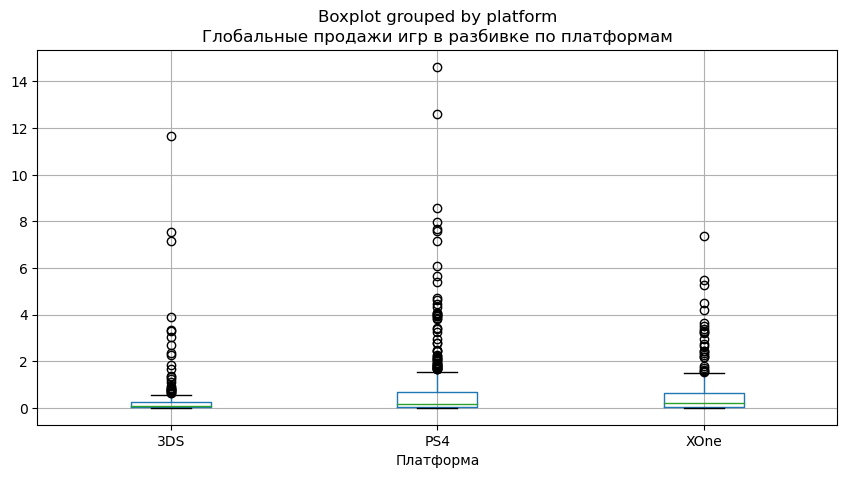

In [34]:
platform_query.boxplot(column = 'total_sales', by = 'platform', figsize = (10,5))
plt.title('Глобальные продажи игр в разбивке по платформам')
#plt.ylabel('Объем продаж')
plt.xlabel('Платформа')
plt.show()

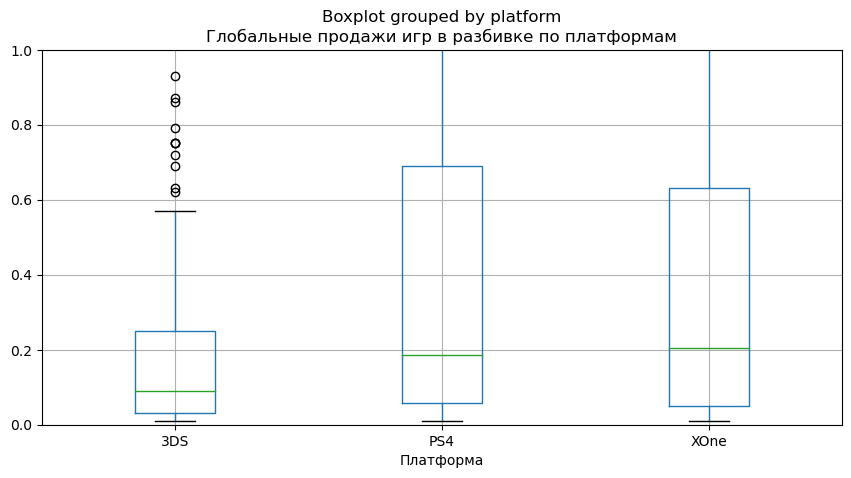

In [35]:
platform_query.boxplot(column = 'total_sales', by = 'platform', figsize = (10,5))
plt.ylim(0, 1)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.show()

В результате изучения "ящика с усами" по общему объему продаж игр в разбивке по потенциально прибыльным платформам установлены выбросы, то есть аномальные значения, выходящие за пределы "усов" графика: у 3DS данные выбросы начинаются приблизительно со значения 0.6 млн. проданных копий, у PS4, XOne - со значения около 1.7 млн. проданных копий.
Левая граница усов находится у 0, медиана: у 3DS около 0.1, у PS4 и XOne около 0.2.

In [36]:
ps4_query = platform_query.query('platform == "PS4"')
display(ps4_query)
#сделала срез по самой потенциально прибыльной платформе для дальнейшего построения диаграммы рассеяния

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


0.40266141068104083

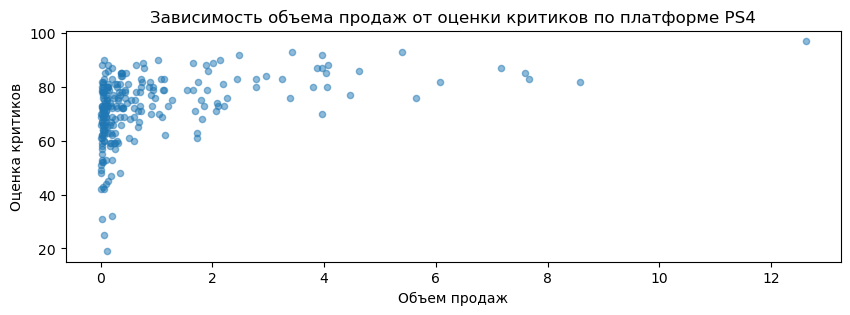

In [73]:
ps4_query.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка критиков',\
               title = 'Зависимость объема продаж от оценки критиков по платформе PS4', alpha = 0.5, figsize = (10,3))
ps4_query['total_sales'].corr(ps4_query['critic_score'])

-0.040131589472697356

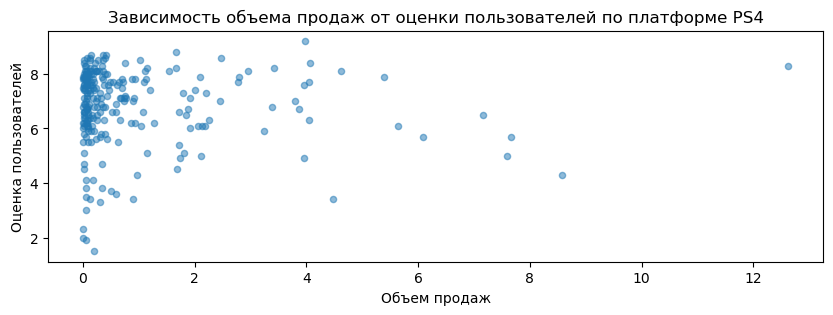

In [74]:
ps4_query.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка пользователей',\
               title = 'Зависимость объема продаж от оценки пользователей по платформе PS4', alpha = 0.5, figsize = (10,3))
ps4_query['total_sales'].corr(ps4_query['user_score'])

По результатам визуализации зависимости объема продаж и отзывов пользователей и критиков игр (по платформе PS4) путем построения диаграмм рассеяния, а также подсчета коэффициента корреляции Пирсона установлено, что взаимосвязь между оценкой и объемом продаж очень слабая. Очень слабая (практически отсутствует) взаимосвязь между оценкой пользователей и объемом продаж (отрицательная коэффициент) и чуть более значительная между оценкой кртиков и объемом продаж (положительный коэффициент). Таким образом, взаимосвязь между оценкой платформы и объемом продаж отсутствует.

In [39]:
ds3_query = platform_query.query('platform == "3DS"')
display(ds3_query)
# для сравнения делаю срез по другой платформе

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,NaN,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16599,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


0.31411749286905105

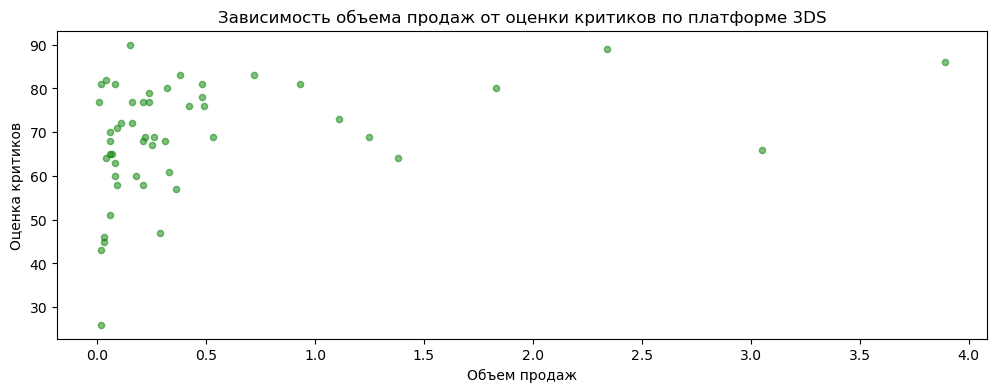

In [40]:
ds3_query.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка критиков',\
               title = 'Зависимость объема продаж от оценки критиков по платформе 3DS', alpha = 0.5, figsize = (12,4), color = 'g')
ds3_query['total_sales'].corr(ds3_query['critic_score'])

0.2151932718527028

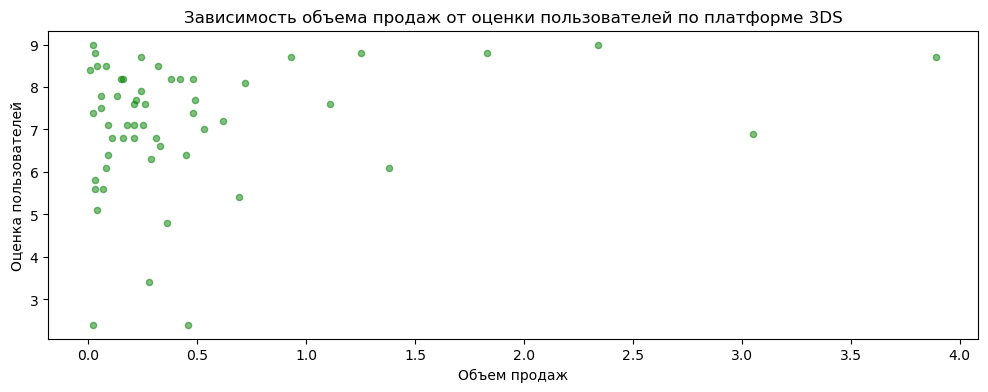

In [41]:
ds3_query.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка пользователей',\
               title = 'Зависимость объема продаж от оценки пользователей по платформе 3DS', alpha = 0.5, figsize = (12,4), color = 'g')
ds3_query['total_sales'].corr(ds3_query['user_score'])

In [42]:
xone_query = platform_query.query('platform == "XOne"')
display(xone_query)
# для сравнения делаю срез по другой платформе

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


0.42867694370333226

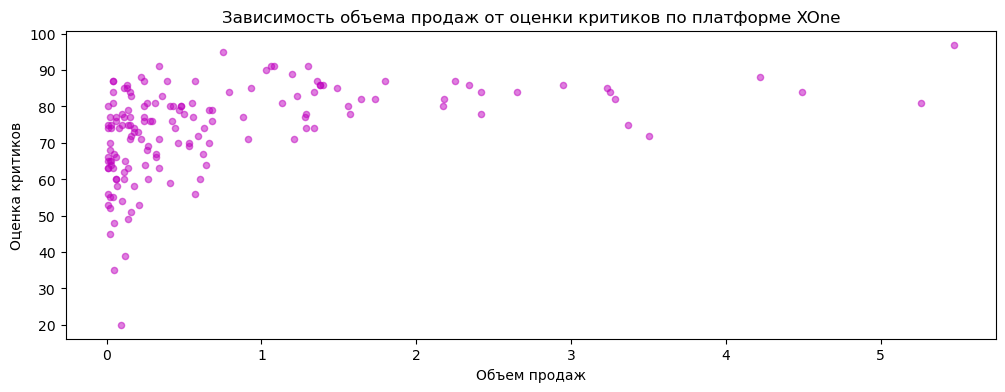

In [43]:
xone_query.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка критиков',\
               title = 'Зависимость объема продаж от оценки критиков по платформе XOne', alpha = 0.5, figsize = (12,4), color = 'm')
xone_query['total_sales'].corr(xone_query['critic_score'])

-0.0703839280647581

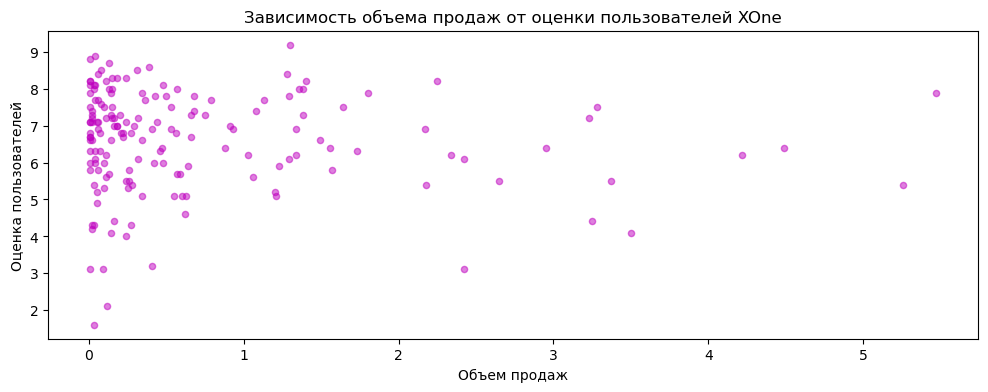

In [44]:
xone_query.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка пользователей',\
               title = 'Зависимость объема продаж от оценки пользователей XOne', alpha = 0.5, figsize = (12,4), color = 'm')
xone_query['total_sales'].corr(xone_query['user_score'])

In [45]:
wiiu_query = data_year_query.query('platform == "WiiU"')
display(wiiu_query)
# для сравнения делаю срез по другой платформе

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
424,Super Mario Maker,WiiU,2015,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
1174,Mario Party 10,WiiU,2015,Misc,0.69,0.53,0.24,0.12,66.0,6.5,E,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


0.370201412480884

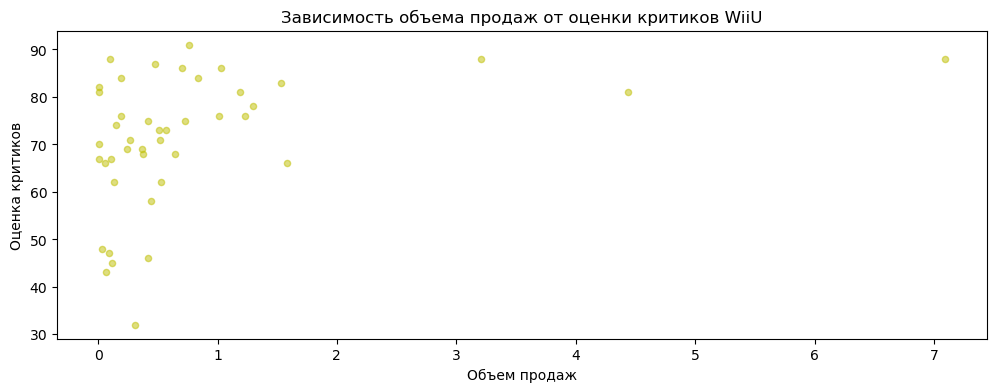

In [46]:
wiiu_query.plot(x = 'total_sales', y = 'critic_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка критиков',\
               title = 'Зависимость объема продаж от оценки критиков WiiU', alpha = 0.5, figsize = (12,4), color = 'y')
wiiu_query['total_sales'].corr(wiiu_query['critic_score'])

0.4079264579217078

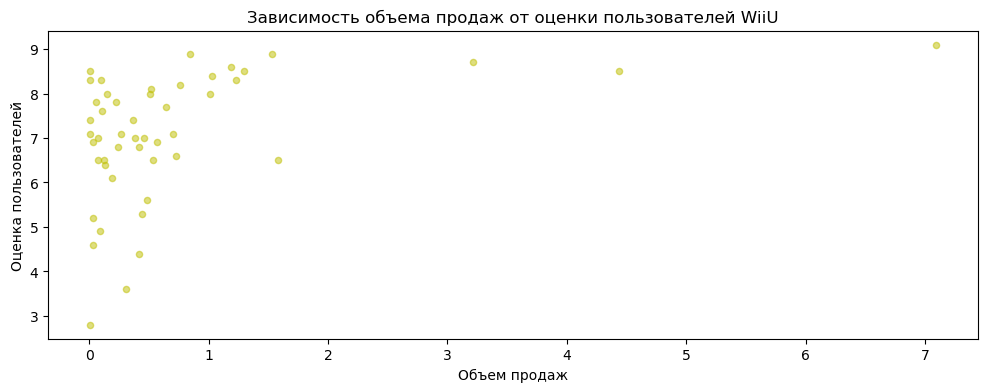

In [47]:
wiiu_query.plot(x = 'total_sales', y = 'user_score', kind = 'scatter', xlabel = 'Объем продаж', ylabel = 'Оценка пользователей',\
               title = 'Зависимость объема продаж от оценки пользователей WiiU', alpha = 0.5, figsize = (12,4), color = 'y')
wiiu_query['total_sales'].corr(wiiu_query['user_score'])

По результатам визуализации зависимости объема продаж и отзывов пользователей и критиков игр (на примере нескольких платформ) путем построения диаграмм рассеяния, а также подсчета коэффициента корреляции Пирсона установлено, что взаимосвязь между оценкой пользователей и критиков и объемом продаж очень слабая. Данная слабая взаимосвязь наблюдается в отношении всех выбранных платформ.

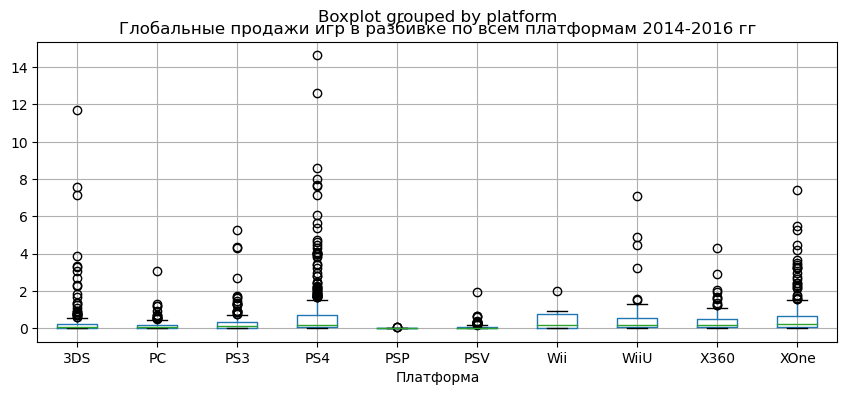

In [77]:
data_year_query.boxplot(column = 'total_sales', by = 'platform', figsize = (10,4))
plt.title('Глобальные продажи игр в разбивке по всем платформам 2014-2016 гг')
plt.xlabel('Платформа')
plt.show()

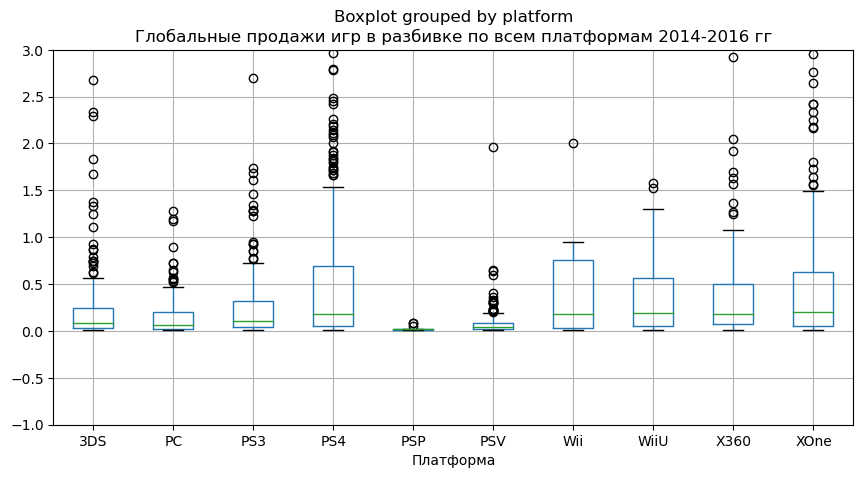

In [49]:
data_year_query.boxplot(column = 'total_sales', by = 'platform', figsize = (10,5))
plt.title('Глобальные продажи игр в разбивке по всем платформам 2014-2016 гг')
plt.ylim(-1,3)
plt.xlabel('Платформа')
plt.show()

На данном графике также хорошо видно, что наибольшие продажи были осуществлены по платформам 3DS, PS4, XOne. Наибольшие средние значения продаж также установлены у платформ PS4, XOne, а также у Wii, однако в отличие от Wii  у 3DS, PS4, XOne зафиксированы частые случаи продаж, выходящих за рамки "усов" (какие-то игры, возможно, оказывались особо удачными).

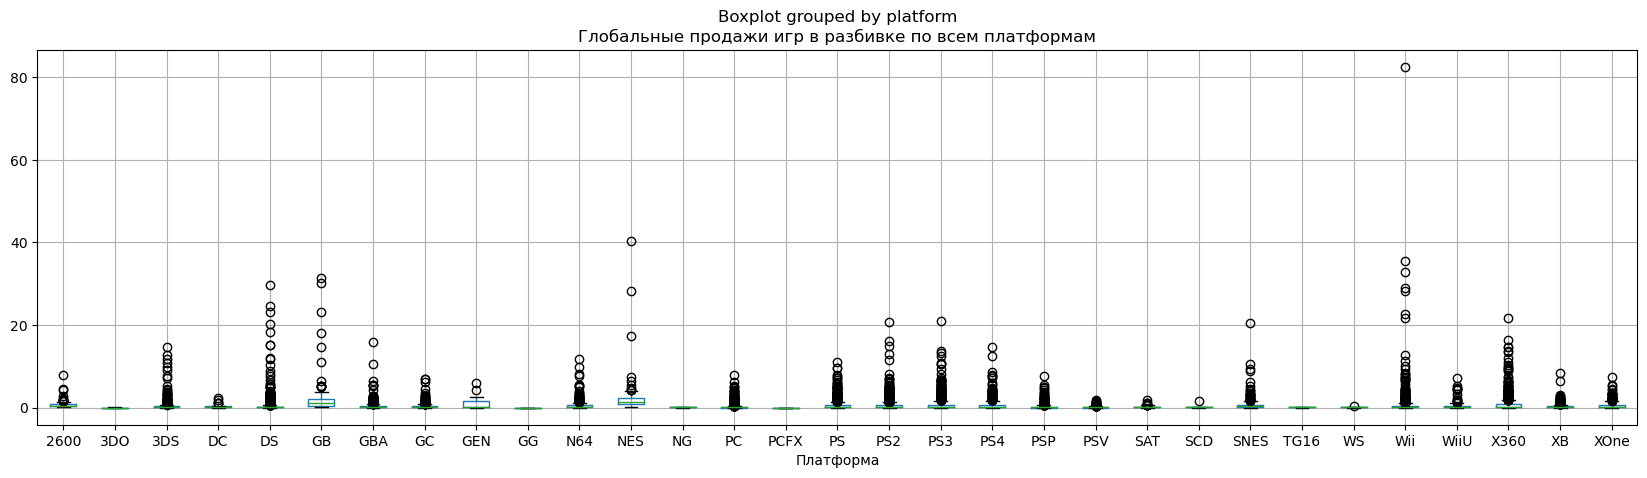

In [50]:
data.boxplot(column = 'total_sales', by = 'platform', figsize = (20,5))
plt.title('Глобальные продажи игр в разбивке по всем платформам')
plt.xlabel('Платформа')
plt.show()

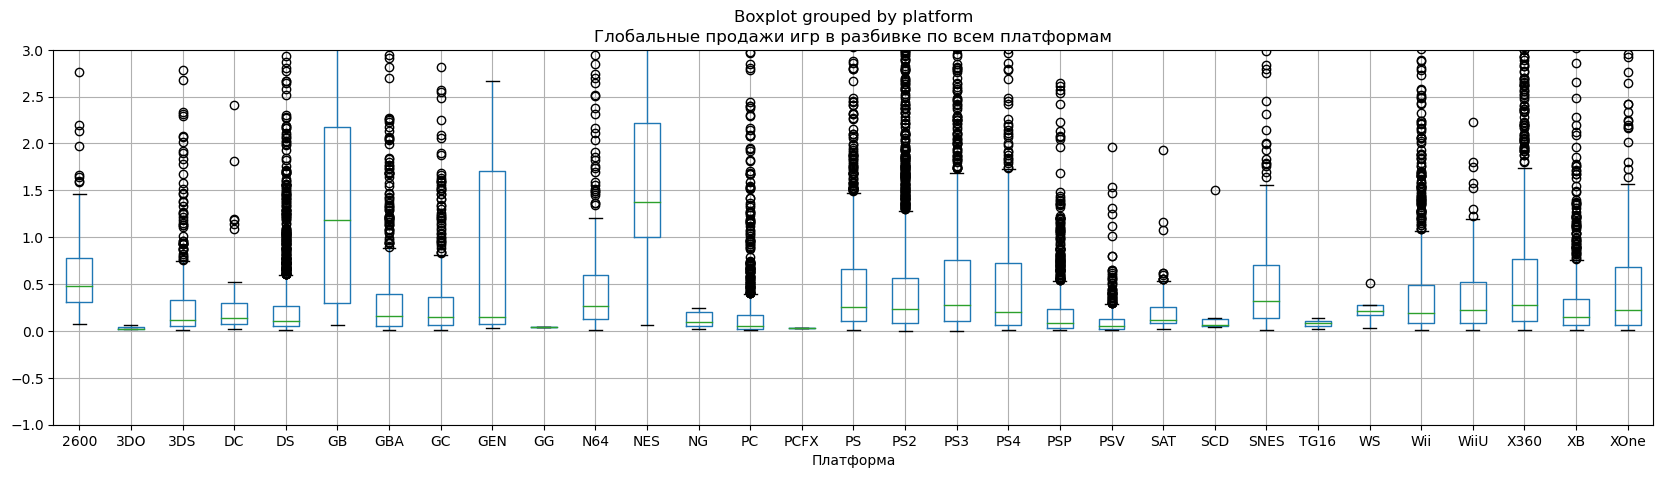

In [51]:
data.boxplot(column = 'total_sales', by = 'platform', figsize = (20,5))
plt.title('Глобальные продажи игр в разбивке по всем платформам')
plt.ylim(-1,3)
plt.xlabel('Платформа')
plt.show()

В разрезе всех платформ первоначального датафрейма выявлено, что наибольшие продажи установлены по довольно многим платформам. Например, по платформе DS, X360. При этом очень низкие уровни продаж установлены по платформам 3DO, GG, PCFX.

In [52]:
data.groupby('platform') ['total_sales'].describe().reset_index()
# посмотрела характерные значения продаж по всем платформам в датафрейме

,platform,count,mean,std,min,25%,50%,75%,max
0,2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
1,3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
2,3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
3,DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
4,DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
5,GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
6,GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
7,GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
8,GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02
9,GG,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04


In [53]:
data_year_query.groupby('platform') ['total_sales'].describe().reset_index()
# посмотрела характерные значения продаж по платформама за перилд 2014-2016 гг.

,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
1,PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
2,PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
3,PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
4,PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
5,PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
6,Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
7,WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
8,X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
9,XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Средние значения объемов продаж "PS4", "3DS", "XOne" сопоставимы со средними значениями игр на других платформах, при этом "жизненный цикл" данных платформ еще не завершен.

In [54]:
data_year_query.pivot_table(index = 'genre', values = 'total_sales',  aggfunc = 'median').reset_index().\
sort_values(by = 'total_sales', ascending = False)

,genre,total_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


Считаю среднее значение объема продаж по жанрам.
Самыми прибыльными жанрами являются: Shooter, Sports, Platform, самыми неприбыльными жанрами являются: Adventure, Puzzle, Strategy.

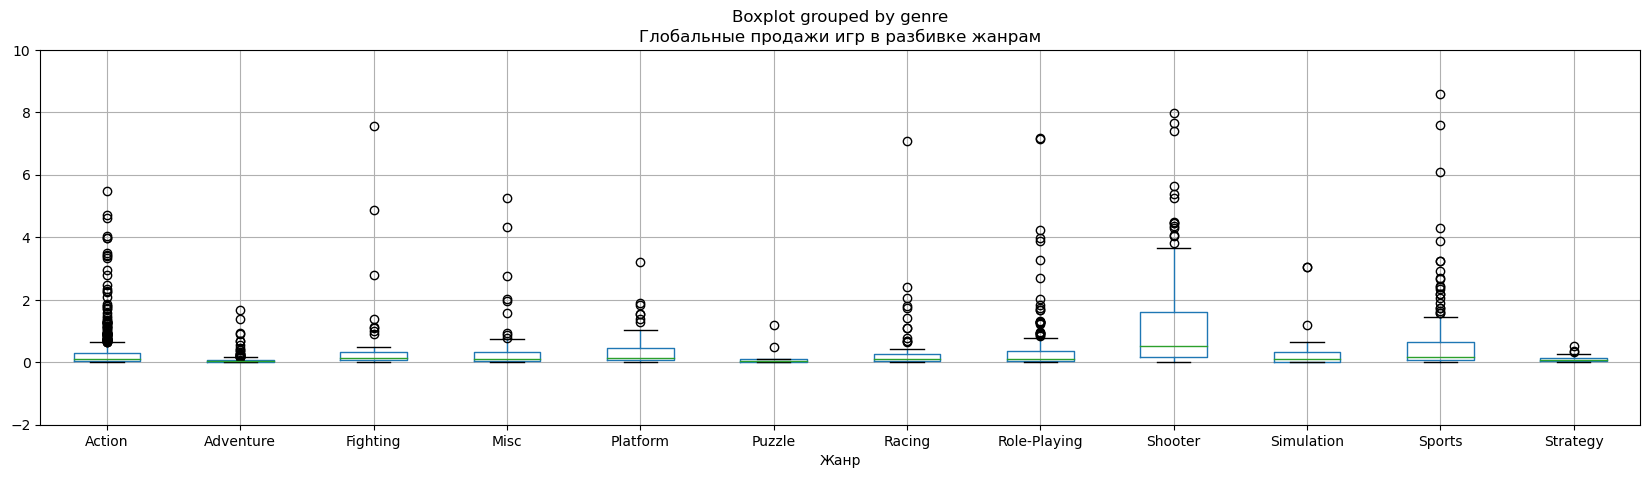

In [55]:
data_year_query.boxplot(column = 'total_sales', by = 'genre', figsize = (20,5))
plt.title('Глобальные продажи игр в разбивке жанрам')
plt.ylim(-2,10)
plt.xlabel('Жанр')
plt.show()

По диаграмме "ящик с усами" устанволено, что наибольшие продажи формируются в основном за счет жанра Shooter (довольно стабильные продажи с высоким средним значением), Sports (довольно много аномальных значений, вероятно, особо успешных игр), Platform, а также Action (также очень много успешных игр, повлекших большие продажи), при этом медианное значение у Sports и Platform значительно ниже, чем у Shooter. Низкие продажи установлены у Puzzle, Adventure, Strategy, все значения продаж на графике практически равны 0, однако у Adventure зафиксированы отдельные успешные игры (значительное количество аномальных "выбросов")

Таким образом, в результате исследовательского анализа данных установлено следующее.В среднем "жизнеспособный" цикл каждой платформы составляет около 10 лет (в основном 10-12 лет, некоторые 4,6,8 лет), новые платформы появляются каждый год.
Поскольку "жизнеспособность" каждой платформы составляет около 10 лет, в целях формирования прогноза на 2017 год я рассмотрела предшествующие 2017му 3 года, то есть период с 2014 по 2016 гг (данного периода будет достаточно для планирования прогнозов бизнеса).
За период с 2014 по 2016 практически по всем платформам наблюдается снижение объема продаж. Платформы, по которым хоть и зафиксирован спад, но при этом объем продаж выше остальных: PS4, 3DS, XOne. Таким образом, данные платформы можно рассматривать как потенциально прибыльные, при этом самая потенциально прибыльная платформа - PS4.

**Шаг 4. Составляю портрет пользователя каждого региона**

**Портрет пользователя в Северной Америке**

  platform  na_sales
3      PS4     98.61
9     XOne     81.27
8     X360     28.30
0      3DS     22.64
2      PS3     22.05


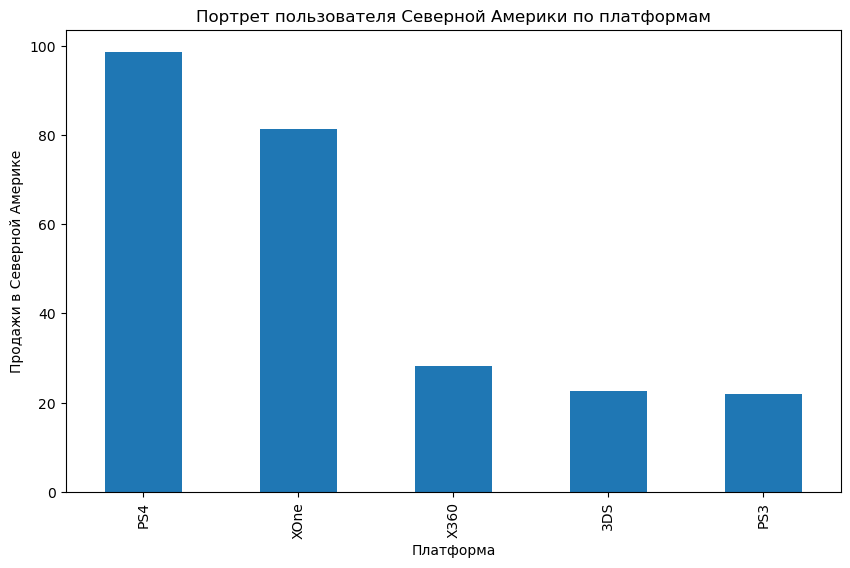

In [56]:
na_sales_pivot_platform = data_year_query.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'na_sales', ascending = False)
na_sales_pivot_platform = na_sales_pivot_platform.head(5)
print(na_sales_pivot_platform)
na_sales_pivot_platform.plot(kind = 'bar', x = 'platform', y = 'na_sales', xlabel = 'Платформа', \
                     ylabel = 'Продажи в Северной Америке', \
                      title = 'Портрет пользователя Северной Америки по платформам', figsize = (10,6), legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Северной Америке

In [57]:
# второй вариант решения через группировку
#na_sales_groupby = data_year_query.groupby('platform') ['na_sales'].sum().sort_values(ascending = False).head(5)
#print(na_sales_groupby)
#na_sales_groupby.plot(kind = 'bar', x = 'platform', y = 'na_sales', xlabel = 'Платформа', \
                      #ylabel = 'Продажи в Северной Америке', \
                      #label = 'Портрет пользователя региона Северной Америки по платформам', figsize = (10,6)).legend()
# с помощью группировки группирую данные по платформе и отображаю сумму продаж в Северной Америке, вывожу топ-5

Таким образом, самыми популярными платформами в Северной Америке являются PS4, XOne, X360, 3DS, PS3. Наиболее популярной является платформа PS4, количество проданных копий составило 98.61 млн.

           genre  na_sales
8        Shooter     79.02
0         Action     72.53
10        Sports     46.13
7   Role-Playing     33.47
3           Misc     15.05


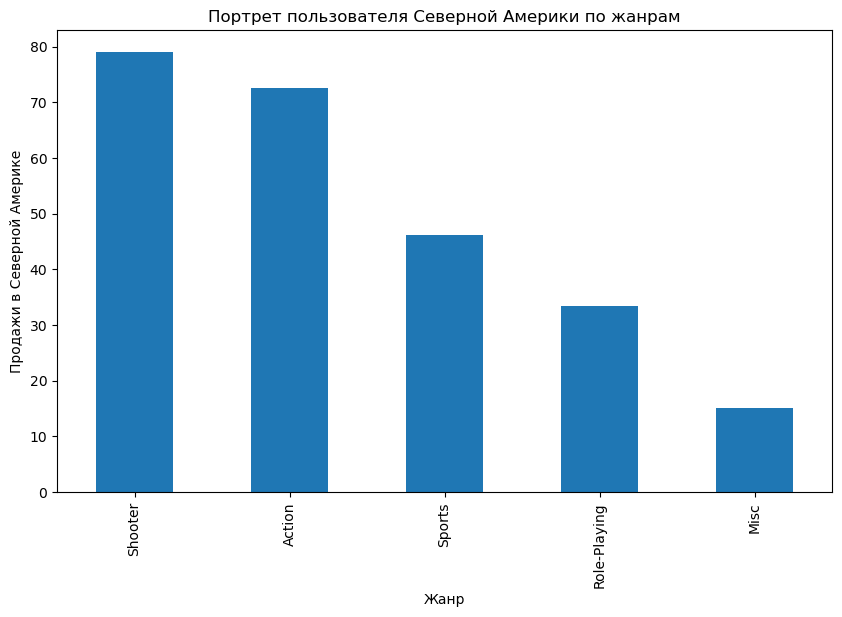

In [58]:
na_sales_pivot_genre = data_year_query.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'na_sales', ascending = False)
na_sales_pivot_genre = na_sales_pivot_genre.head(5)
print(na_sales_pivot_genre)
na_sales_pivot_genre.plot(kind = 'bar', x = 'genre', y = 'na_sales', xlabel = 'Жанр', \
                      ylabel = 'Продажи в Северной Америке', \
                      title = 'Портрет пользователя Северной Америки по жанрам', figsize = (10,6), legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Северной Америке

Самые популярные жанры в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc. При этом жанр Shooter составляет 32% от общего количества продаж среди топ-5 игровых жанров.

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

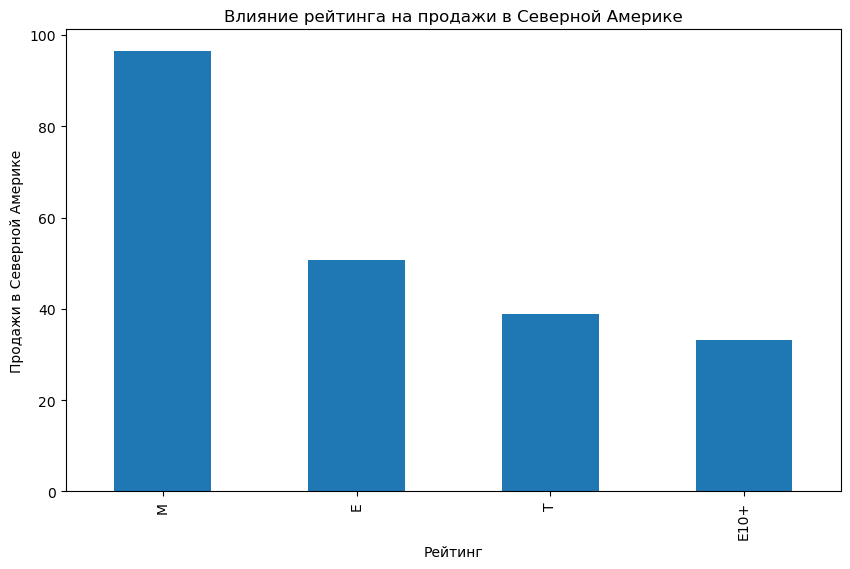

In [59]:
na_rating_groupby = data_year_query.groupby('rating') ['na_sales'].sum().sort_values(ascending = False)
display(na_rating_groupby)
na_rating_groupby.plot(kind = 'bar', x = 'rating', y = 'na_sales', xlabel = 'Рейтинг', \
                      ylabel = 'Продажи в Северной Америке', \
                      title = 'Влияние рейтинга на продажи в Северной Америке', figsize = (10,6), legend=False)
plt.show()

В результате визуализации влияния рейтинга ESRB на продажи в Северной Америке установлено, что компьютерные игры с рейтингом М (для взрослых) преобладают, далее следует рейтинг Е (рейтинг для всех возрастов), рейтинг Т (для подростков). Меньше всего установлено продаж компьютерных игр с рейтингом Е10+ (Для всех от 10 лет и старше).


**Портрет пользователя в Европе**

  platform  eu_sales
3      PS4    130.04
9     XOne     46.25
2      PS3     25.54
1       PC     17.97
0      3DS     16.12


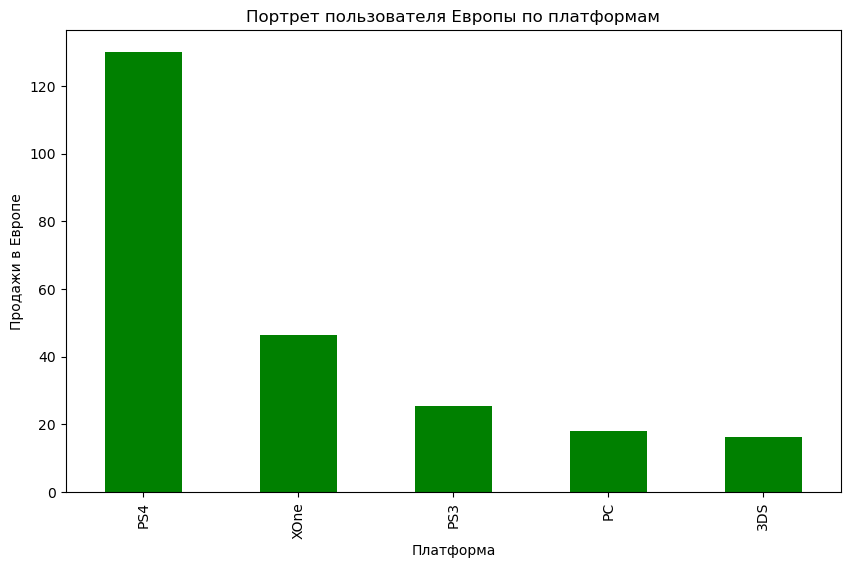

In [60]:
eu_sales_pivot_platform = data_year_query.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'eu_sales', ascending = False)
eu_sales_pivot_platform = eu_sales_pivot_platform.head(5)
print(eu_sales_pivot_platform)
eu_sales_pivot_platform.plot(kind = 'bar', x = 'platform', y = 'eu_sales', xlabel = 'Платформа', \
                     ylabel = 'Продажи в Европе', \
                     title = 'Портрет пользователя Европы по платформам', figsize = (10,6), color = 'g', legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Европе

Таким образом, самыми популярными платформами в Европе являются  PS4, XOne, PS3, PC, 3DS. Наиболее популярной платформой является  PS4, продажи данной платформы составили 55% от общих продаж топ-5 платформ в Европе. Наименее востребованной оказалась платформа 3DS.

           genre  eu_sales
0         Action     74.68
8        Shooter     65.52
10        Sports     45.73
7   Role-Playing     28.17
6         Racing     14.13


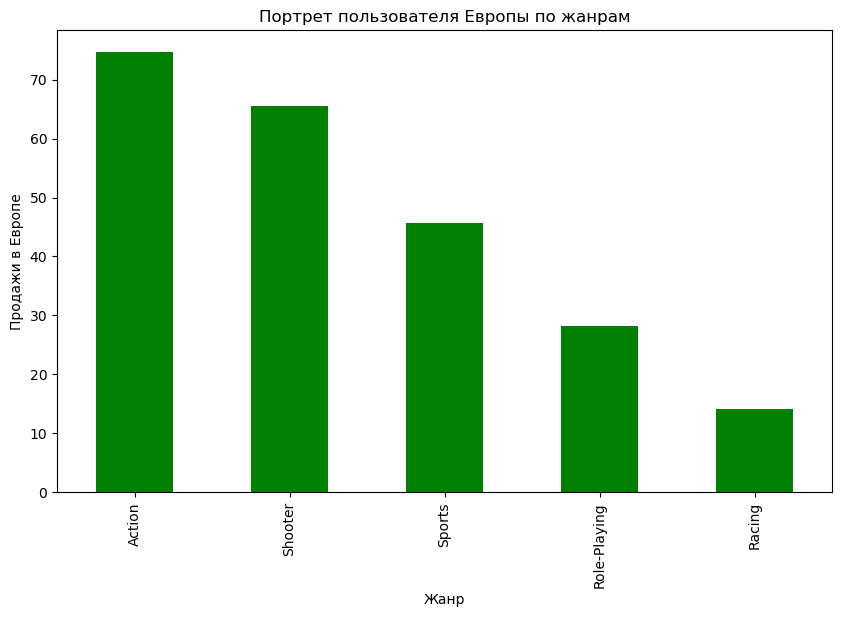

In [61]:
eu_sales_pivot_genre = data_year_query.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'eu_sales', ascending = False)
eu_sales_pivot_genre = eu_sales_pivot_genre.head(5)
print(eu_sales_pivot_genre)
eu_sales_pivot_genre.plot(kind = 'bar', x = 'genre', y = 'eu_sales', xlabel = 'Жанр', \
                      ylabel = 'Продажи в Европе', \
                      title = 'Портрет пользователя Европы по жанрам', figsize = (10,6), color = 'g', legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Европе

Самые популярные жанры в Европе: Action, Shooter, Sports, Role-Playing, Racing.

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

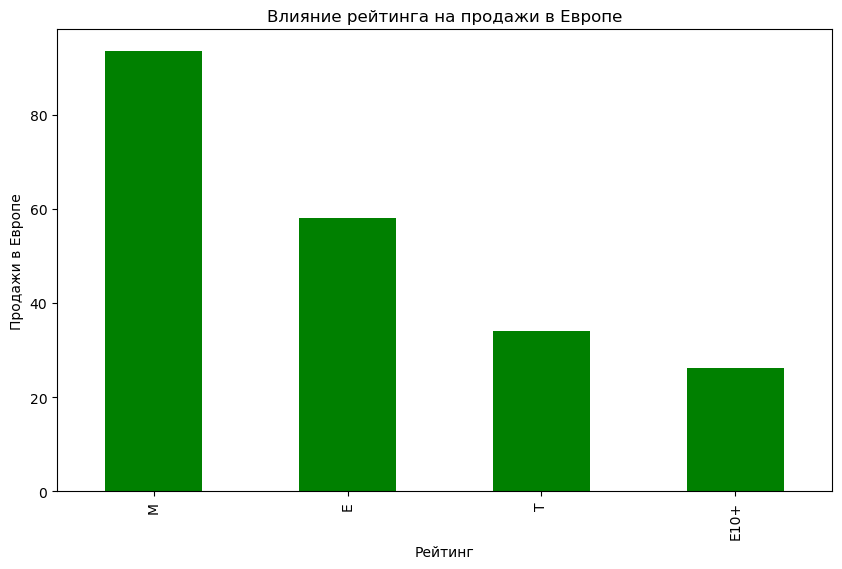

In [62]:
eu_rating_groupby = data_year_query.groupby('rating') ['eu_sales'].sum().sort_values(ascending = False)
display(eu_rating_groupby)
eu_rating_groupby.plot(kind = 'bar', x = 'rating', y = 'eu_sales', xlabel = 'Рейтинг', \
                      ylabel = 'Продажи в Европе', \
                      title = 'Влияние рейтинга на продажи в Европе', figsize = (10,6), color = 'g', legend=False)
plt.show()

В результате визуализации влияния рейтинга ESRB на продажи в Европе установлено, что компьютерные игры с рейтингом М (для взрослых) преобладают, далее следует рейтинг Е (рейтинг для всех возрастов), рейтинг Т (для подростков). Меньше всего установлено продаж компьютерных игр с рейтингом Е10+ (Для всех от 10 лет и старше). В данном случае портрет пользователя в Европе совпадает с портретом пользователя в Северной Америке.

**Портрет пользователя в Японии**

  platform  jp_sales
0      3DS     44.24
3      PS4     15.02
5      PSV     14.54
2      PS3     11.22
7     WiiU      7.31


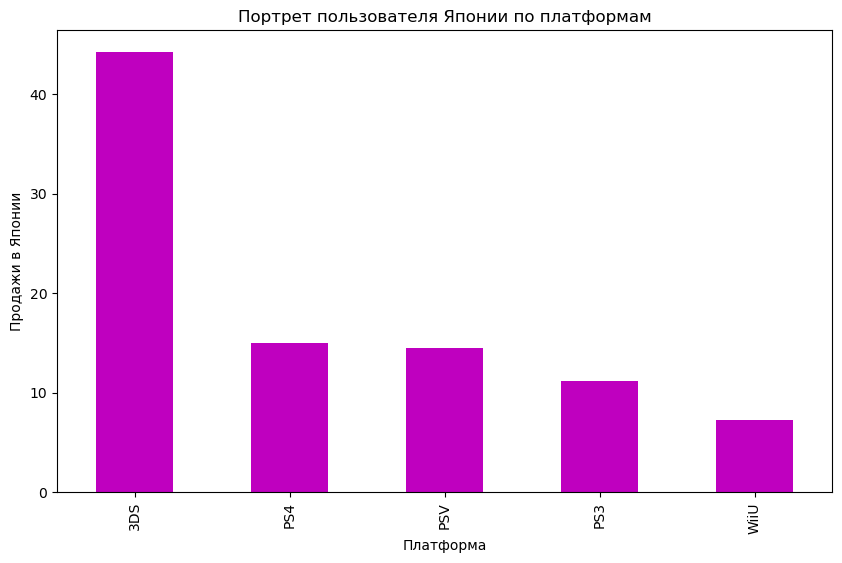

In [63]:
jp_sales_pivot_platform = data_year_query.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'jp_sales', ascending = False)
jp_sales_pivot_platform = jp_sales_pivot_platform.head(5)
print(jp_sales_pivot_platform)
jp_sales_pivot_platform.plot(kind = 'bar', x = 'platform', y = 'jp_sales', xlabel = 'Платформа', \
                     ylabel = 'Продажи в Японии', \
                     title = 'Портрет пользователя Японии по платформам', figsize = (10,6), color = 'm', legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Японии

Таким образом, самыми популярными платформами в Японии являются 3DS, PS4, PSV, PS3, WiiU. Наиболее популярной является платформа 3DS, количество проданных копий составило 44.24 млн. копий, что составляет парктически 48% от общих продаж топ-5 платформ. Наименее популярной в Японии среди топ-5 платформ оказалась платформа WiiU.

          genre  jp_sales
7  Role-Playing     31.16
0        Action     29.58
2      Fighting      6.37
3          Misc      5.61
8       Shooter      4.87


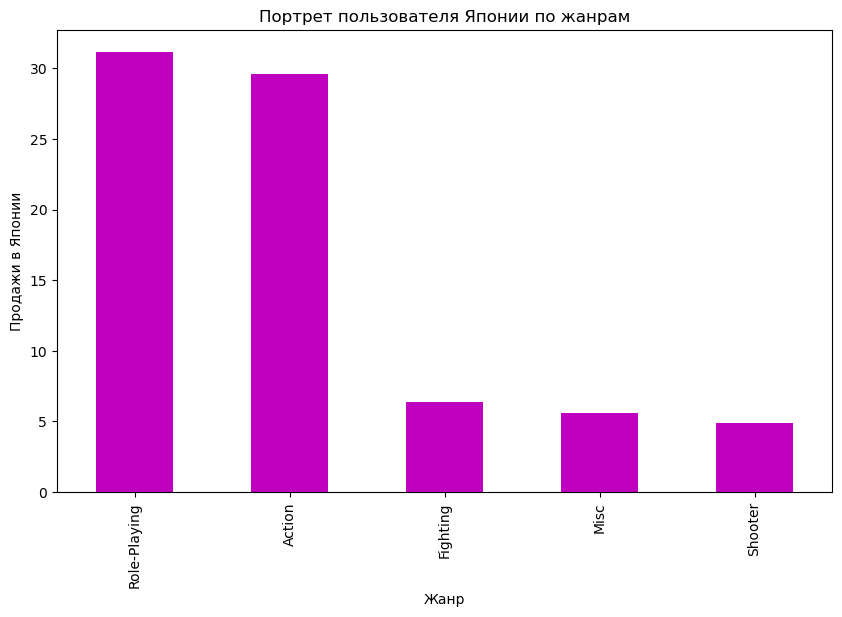

In [64]:
jp_sales_pivot_genre = data_year_query.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').reset_index().\
sort_values(by = 'jp_sales', ascending = False)
jp_sales_pivot_genre = jp_sales_pivot_genre.head(5)
print(jp_sales_pivot_genre)
jp_sales_pivot_genre.plot(kind = 'bar', x = 'genre', y = 'jp_sales', xlabel = 'Жанр', \
                      ylabel = 'Продажи в Японии', \
                      title = 'Портрет пользователя Японии по жанрам', figsize = (10,6), color = 'm', legend=False)
plt.show()
#создала сводную таблицу, чтобы отобразить топ-5 платформ в Японии

В Японии наиболее популярными жанрами являются Role-Playing и Action. Наименее популярный жанр среди топ-5 - Shooter.

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

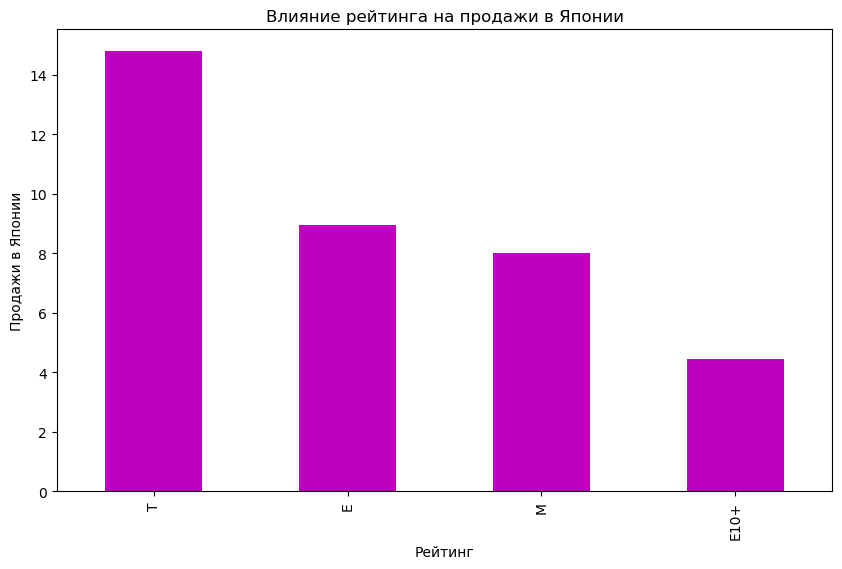

In [65]:
jp_rating_groupby = data_year_query.groupby('rating') ['jp_sales'].sum().sort_values(ascending = False)
display(jp_rating_groupby)
jp_rating_groupby.plot(kind = 'bar', x = 'rating', y = 'jp_sales', xlabel = 'Рейтинг', \
                      ylabel = 'Продажи в Японии', \
                      title = 'Влияние рейтинга на продажи в Японии', figsize = (10,6), color = 'm', legend=False)
plt.show()

В результате визуализации влияния рейтинга ESRB на продажи в Японии установлено, что компьютерные игры с рейтингом Т (для подростков) сформировали большую часть продаж, следующие по популярности игры с рейтингом Е (рейтинг для всех возрастов), затем следует М (для взрослых). Рейтинг Е10+ (для всех от 10 лет и старше) является наименее популярным среди топ-5. 

Таким образом, по результатам анализа портрета пользователя каждого из регионов установлено следующее. Портреты пользователей Северной Америки и Европы довольно схожи: 4 из 5 топ-5 платформ по популярности в Европе и Северной Америке одинаковы, аналогично предпочтения пользователей в жанрах также зачастую сходятся: на первых четырех местах как в Европе, так и в Северной Америке находятся жанры Shooter, Action, Sports, Role-Playing. Выбор игр по рейтингам у пользователей Северной Америки и Европы идентичен. Пользователи Японии больше отличаются от иных пользователей как в выборе платформ, так и в жанрах. Тем не менее, в Японии в топ-5 популярных платформ вошли 3DS, PS4, PS3, которые также входят в топ-5 в Северной Америке и Европе. Лидирующим жанром в Японии является Role-playing, наименее популярным является жанр Shooter. Наиболее популярными в Японии являются компьютерные игры рейтинга Т (для подростков).


**Шаг 5. Проверяю гипотезы**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Таким образом, нулевая гипотеза - средние значения рейтингов двух платформ равны. Альтернативная гипотеза - средние значения рейтингов двух платформ не равны

In [66]:
rating_xbox = data_year_query.query('platform == "XOne"') #сделала срез по нужной платформе
display(rating_xbox.head(5))
rating_pc =  data_year_query.query('platform == "PC"') #сделала срез по нужной платформе
display(rating_pc.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1677,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,NaN,NaN,NaN,1.19
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90


In [67]:
h_rating_xbox = rating_xbox['user_score']
h_rating_pc = rating_pc['user_score']
alpha = 0.05 # задаю уровень значимости
results = st.ttest_ind(h_rating_xbox, h_rating_pc, nan_policy='omit' ) # провожу ttest для двух выборок
print('p-значение:', results.pvalue)
if results.pvalue < alpha: # проверяю гипотезу
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Таким образом, была выдвинута гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые", в связи с чем я сформулировала нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза- 
средние значения рейтингов двух платформ не равны. Поскольку вопрос состоял в том, равны ли средние пользовательские рейтинги, я проверяю двустороннюю гипотезу, применяя st.ttest_ind(метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам). Полученное значение p-value больше заданного уровня значимости, следовательно, нет оснований отвергнуть нулевую гипотезу, то есть средние пользовательские рейтинги платформ Xbox One и PC равны.


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Таким образом, нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

In [68]:
rating_action = data_year_query.query('genre == "Action"') #сделала срез по нужному жанру
display(rating_action.head(5))
rating_sports =  data_year_query.query('genre == "Sports"') #сделала срез по нужному жанру
display(rating_sports.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87


In [69]:
h_rating_action = rating_action['user_score']
h_rating_sports = rating_sports['user_score']
alpha = 0.05 # задаю уровень значимости
results = st.ttest_ind(h_rating_action, h_rating_sports, nan_policy='omit' ) # провожу ttest для двух выборок
print('p-значение:', results.pvalue)
if results.pvalue < alpha: # проверяю гипотезу
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Таким образом, была выдвинута задача проверить гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". Поскольку гипотеза выглядит как "среднее генеральной совокупности равно конкретному значению/среднее генеральной совокупности больше или меньше конкретного значения", я сформулирую нулевую гипотезу следующим образом: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны. Поскольку вопрос состоял в том, равны ли средние пользовательские рейтинги, я проверяю двустороннюю гипотезу, применяя st.ttest_ind(метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам). Полученное значение p-value меньше заданного уровня значимости, следовательно, я отвергаю нулевую гипотезу в пользу альтернативной. Таким образом, с учетом того, что нулевая гипотеза была сформулирована как "средние пользовательские рейтинги жанров Action и Sports равны", то гипотеза "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" не отвергается, т.к. есть основания отвергнуть нулевую гипотезу, предполагающую, что средние пользовательские рейтинги равны.


Таким образом, по результатам проверки гипотез сделан следующий вывод:
1. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергается.
2. Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны" отвергается.

**Шаг 6. Общий вывод**

Таким образом, в рамках выполнения проекта по исследовательскому и статистическому анализа данных, в первую очередь, я изучила общую информацию, представленную в датафрейме, осуществила предобработку данных: обработала пропуски и дубликаты, заменила названия столбцов путем их приведения к нижнему регистру, преобразовала данные в нужные типы. Предобработка данных позволила очистить датафрейм от некорректных данных, что могло бы исказить результаты анализа.
 
В ходе проведения исследовательского анализа данных установлено следующее. В среднем "жизнеспособный" цикл каждой платформы компьютерных игр составляет около 10 лет (в основном 10-12 лет, некоторые 4,6,8 лет), новые платформы появляются каждый год.
В целях формирования прогноза на 2017 год я рассмотрела наиболее актуальный для прогноза период: с 2014 по 2016 гг.
За период с 2014 по 2016 практически по всем платформам наблюдается снижение объема продаж. Платформы, по которым хоть и зафиксирован спад, но при этом объем продаж выше остальных: PS4, 3DS, XOne. Таким образом, данные платформы можно рассматривать как потенциально прибыльные, при этом самая потенциально прибыльная платформа - PS4. Следует также отметить, что взаимосвязь между оценкой платформ и объемом продаж слабая.

При составлении портрета пользователя каждого из регионов установлено следующее. Портреты пользователей Северной Америки и Европы довольно схожи: 4 из 5 топ-5 платформ по популярности в Европе и Северной Америке одинаковы, аналогично предпочтения пользователей в жанрах также зачастую сходятся: в топ-4 как в Европе, так и в Северной Америке входят жанры Shooter, Action, Sports, Role-Playing. Выбор игр по рейтингам у пользователей Северной Америки и Европы идентичен. Пользователи Японии больше отличаются от иных пользователей как в выборе платформ, так и в жанрах. Тем не менее, в Японии в топ-5 популярных платформ вошли 3DS, PS4, PS3, которые также входят в топ-5 в Северной Америке и Европе. Лидирующим жанром в Японии является Role-Playing, наименее популярным является жанр Shooter. Наиболее популярными в Японии являются компьютерные игры рейтинга Т (для подростков).

Также в ходе реализации проекта были проверены следующие гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
По результатам проверки установлено, что гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергается.
Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" не отвергается (т.к. отвергается нулевая гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны").

В связи с вышеизложенным, необходимо отметить, что потенциально прибыльными платформами являются: PS4, 3DS, XOne, при этом самая потенциально прибыльная платформа - PS4.
Также установлено, что успешность игры во многом зависит от региона пользователя: в зависимости от региона (страны) меняется и портрет пользователя: в основном выбор различных жанров и платформ.

Таким образом, считаю целесообразным дать следующие рекомендации. При проведении рекламных кампаний и прогнозировании продаж необходимо учитывать портрет пользователей по регионам, востребованность платформ (уровень продаж платформ), "жизненный цикл" платформ, рейтинг игр. Считаю целесообразным сделать ставку, в первую очередь, на платформы PS4 и XOne. Наиболее популярными в целом по всем регионам, вероятнее всего, будут игры в жанрах Shooter, Action, Role-Playing, а в Северной Америке и Европе также Sports. Поскольку Северная Америка и Европа в целом приносят больше прибыли за счет большего количества продаж, считаю, что рейтинг игр, которого стоит придерживаться: М (для взрослых), а также Е (для всех). 
